In [ ]:
#!pip install surprise

# Import Library and Read Dataset

In [ ]:
import pandas as pd # to perform data processing and analysis (such as CSV, Excel, SQL)
import numpy as np # to perform numerical mathematical operations, such as array and matrix processing
import matplotlib.pyplot as plt # to create data visualizations
import seaborn as sns # to make the data visualization more statistical

In [ ]:
# to download files from the internet
!wget --no-check-certificate \
https://files.grouplens.org/datasets/movielens/ml-latest-small.zip

--2023-01-05 12:21:23--  https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip.43’

ml-latest-small.zip 100%[===================>] 955.28K  --.-KB/s    in 0.1s    

2023-01-05 12:21:23 (7.07 MB/s) - ‘ml-latest-small.zip.43’ saved [978202/978202]



In [ ]:
# to extract the downloaded zip file
import zipfile
local_zip = 'ml-latest-small.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [ ]:
# to read CSV file into dataframe.
links = pd.read_csv('/content/ml-latest-small/links.csv')
movies = pd.read_csv('/content/ml-latest-small/movies.csv')
ratings = pd.read_csv('/content/ml-latest-small/ratings.csv')
tags = pd.read_csv('/content/ml-latest-small/tags.csv')

# Pipeline

## Collaborative Filtering



In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [ ]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit = 'ms')

In [ ]:
ratings.sample(10)

,userId,movieId,rating,timestamp
26659,182,3671,3.0,1970-01-13 05:05:54.552
32341,221,1208,5.0,1970-01-13 20:39:35.995
8273,57,1544,2.0,1970-01-12 04:16:38.485
92153,596,179819,3.5,1970-01-18 18:35:08.663
66830,432,597,4.0,1970-01-16 05:39:51.561
78772,489,2730,3.5,1970-01-16 10:30:30.691
46609,305,163985,4.5,1970-01-18 07:02:49.748
21015,139,53996,2.5,1970-01-17 19:52:04.510
11477,68,69644,3.0,1970-01-15 16:32:02.279
33063,226,112,4.0,1970-01-13 16:33:40.219


In [ ]:
ratings.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


In [ ]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
ratings.duplicated().sum()

0

In [ ]:
ratings.dtypes

userId                int64
movieId               int64
rating              float64
timestamp    datetime64[ns]
dtype: object

In [ ]:
ratings.sample(10)

,userId,movieId,rating,timestamp
30174,210,177765,5.0,1970-01-18 19:07:12.257
97957,606,4084,2.0,1970-01-14 14:03:49.713
55024,365,59315,3.5,1970-01-18 05:25:33.564
41756,284,216,4.0,1970-01-10 15:19:46.827
26333,182,1449,4.0,1970-01-13 04:59:44.032
83806,534,43928,3.5,1970-01-17 21:29:47.996
21398,140,3578,4.0,1970-01-12 06:21:05.043
49258,318,4995,3.5,1970-01-15 12:22:12.845
63073,414,2278,4.0,1970-01-12 03:05:15.808
62945,414,1944,4.0,1970-01-12 03:05:12.442


In [ ]:
# Split dataset  %75 train and %25 test
df_train = ratings.sample(frac=0.75)
df_test = ratings.drop(df_train.index)
print("Train data: {}, test data: {}".format(len(df_train), len(df_test)))

Train data: 75627, test data: 25209


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


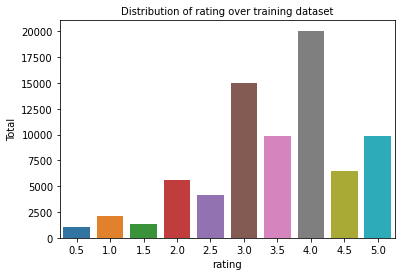

In [ ]:
# Data visualization of Ratings
fig, ax = plt.subplots()
sns.countplot(df_train.rating)
plt.title('Distribution of rating over training dataset', fontsize=10)
ax.set_ylabel('Total')
plt.show()

In [ ]:
# Library to evaluate a recommendation algorithm model using cross validation techniques.
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [ ]:
# Define Format
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']],reader)

In [ ]:
benchmark = []
# Select the algorithm
algorithms = [
    SVD(n_epochs = 1, n_factors = 20), 
    SVD(n_epochs = 2, n_factors = 20), 
    SVD(n_epochs = 5) 
]
algorithm = algorithms[0]

# Perform cross validation
results = cross_validate(algorithm, data, measures=['RMSE'], cv=4, verbose=True)

# Get results & append algorithm name
tmp = pd.DataFrame.from_dict(results).mean(axis=0)
tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]]))
benchmark.append(tmp)
print(benchmark)

Evaluating RMSE of algorithm SVD on 4 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Mean    Std     
RMSE (testset)    0.9472  0.9309  0.9279  0.9345  0.9351  0.0073  
Fit time          0.10    0.17    0.15    0.13    0.14    0.03    
Test time         0.19    0.50    0.18    0.38    0.31    0.13    
[test_rmse    0.935139
fit_time     0.138486
test_time    0.313176
0                 SVD
dtype: object]


In [ ]:
from surprise.model_selection import train_test_split
from surprise import accuracy
trainset, testset = train_test_split(data, test_size=0.25)
algorithm.fit(trainset)
predictions = algorithm.test(testset)
accuracy.rmse(predictions)

RMSE: 0.9362


0.9361645843556886

In [ ]:
def get_collaborative_filtering_recommendations(userId, movieId):
    return algorithm.predict(userId, movieId).est

In [ ]:
get_collaborative_filtering_recommendations(368, 1804)

2.9593271339876184

## Content Based Filtering

In [ ]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
movies.dtypes

movieId     int64
title      object
genres     object
dtype: object

In [ ]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [ ]:
tags.drop('userId', inplace=True, axis=1)

In [ ]:
df = movies.merge(tags,on='movieId')

In [ ]:
df.isna().sum()

movieId      0
title        0
genres       0
tag          0
timestamp    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dtypes

movieId       int64
title        object
genres       object
tag          object
timestamp     int64
dtype: object

In [ ]:
df.sample(10)

,movieId,title,genres,tag,timestamp
2506,8360,Shrek 2 (2004),Adventure|Animation|Children|Comedy|Musical|Ro...,ogres,1138040236
619,914,My Fair Lady (1964),Comedy|Drama|Musical|Romance,George Bernard Shaw,1137202973
995,1411,Hamlet (1996),Crime|Drama|Romance,Shakespeare,1137191597
1272,2357,Central Station (Central do Brasil) (1998),Drama,South America,1137205389
1427,2959,Fight Club (1999),Action|Crime|Drama|Thriller,twist ending,1457842777
2920,57669,In Bruges (2008),Comedy|Crime|Drama|Thriller,Ralph Fiennes,1269832572
1450,2959,Fight Club (1999),Action|Crime|Drama|Thriller,imaginary friend,1498456945
289,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,funny,1498456383
117,223,Clerks (1994),Comedy,quirky,1457844073
804,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,sequel,1262795800


In [ ]:
# Data maybe consist of lower/upper case problems. We can solve this problem using regular expirations
import unicodedata
import re
def clean_data(value):
    value =  unicodedata.normalize('NFD', value).encode('ascii', 'ignore').decode('ascii')
    x = str.lower(re.sub(r"[^a-zA-Z0-9]+", "_", value.strip().replace(" ","_")))
    if(x != '_'):
        return x 
    else:
        return " " 

In [ ]:
print(df.title)
df['title'] = df['title'].apply((lambda title: clean_data(title)))
df.title

0                     Toy Story (1995)
1                     Toy Story (1995)
2                     Toy Story (1995)
3                       Jumanji (1995)
4                       Jumanji (1995)
                     ...              
3678    Solo: A Star Wars Story (2018)
3679         Gintama: The Movie (2010)
3680         Gintama: The Movie (2010)
3681         Gintama: The Movie (2010)
3682         Gintama: The Movie (2010)
Name: title, Length: 3683, dtype: object


0                    toy_story_1995_
1                    toy_story_1995_
2                    toy_story_1995_
3                      jumanji_1995_
4                      jumanji_1995_
                    ...             
3678    solo_a_star_wars_story_2018_
3679         gintama_the_movie_2010_
3680         gintama_the_movie_2010_
3681         gintama_the_movie_2010_
3682         gintama_the_movie_2010_
Name: title, Length: 3683, dtype: object

In [ ]:
print(df.genres)
df['genres'] = df['genres'].apply((lambda title: clean_data(title)))
df.genres

0       Adventure|Animation|Children|Comedy|Fantasy
1       Adventure|Animation|Children|Comedy|Fantasy
2       Adventure|Animation|Children|Comedy|Fantasy
3                        Adventure|Children|Fantasy
4                        Adventure|Children|Fantasy
                           ...                     
3678               Action|Adventure|Children|Sci-Fi
3679                 Action|Animation|Comedy|Sci-Fi
3680                 Action|Animation|Comedy|Sci-Fi
3681                 Action|Animation|Comedy|Sci-Fi
3682                 Action|Animation|Comedy|Sci-Fi
Name: genres, Length: 3683, dtype: object


0       adventure_animation_children_comedy_fantasy
1       adventure_animation_children_comedy_fantasy
2       adventure_animation_children_comedy_fantasy
3                        adventure_children_fantasy
4                        adventure_children_fantasy
                           ...                     
3678               action_adventure_children_sci_fi
3679                 action_animation_comedy_sci_fi
3680                 action_animation_comedy_sci_fi
3681                 action_animation_comedy_sci_fi
3682                 action_animation_comedy_sci_fi
Name: genres, Length: 3683, dtype: object

In [ ]:
# Now cumulate all the words on a column, say bag of words :)
df['bag_of_words'] = df['genres']
df['bag_of_words'] = df['bag_of_words'].apply(lambda x: ''.join(x)) + " " + df['title']
df.bag_of_words

0       adventure_animation_children_comedy_fantasy to...
1       adventure_animation_children_comedy_fantasy to...
2       adventure_animation_children_comedy_fantasy to...
3                adventure_children_fantasy jumanji_1995_
4                adventure_children_fantasy jumanji_1995_
                              ...                        
3678    action_adventure_children_sci_fi solo_a_star_w...
3679    action_animation_comedy_sci_fi gintama_the_mov...
3680    action_animation_comedy_sci_fi gintama_the_mov...
3681    action_animation_comedy_sci_fi gintama_the_mov...
3682    action_animation_comedy_sci_fi gintama_the_mov...
Name: bag_of_words, Length: 3683, dtype: object

We will extract feature from bag of words. Most command way for text is TF-IDF. And we will use this transformer.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.bag_of_words)
tfidf.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['101_dalmatians_1996_',
 '101_dalmatians_one_hundred_and_one_dalmatians_1961_',
 '10_cloverfield_lane_2016_',
 '10_things_i_hate_about_you_1999_',
 '11_09_01_september_11_2002_',
 '127_hours_2010_',
 '12_angry_men_1957_',
 '13_going_on_30_2004_',
 '2001_a_space_odyssey_1968_',
 '21_grams_2003_',
 '25th_hour_2002_',
 '28_days_later_2002_',
 '39_steps_the_1935_',
 '3_10_to_yuma_2007_',
 '400_blows_the_les_quatre_cents_coups_1959_',
 '40_year_old_virgin_the_2005_',
 '42_up_1998_',
 '84_charing_cross_road_1987_',
 '8mm_1999_',
 '_500_days_of_summer_2009_',
 '_and_justice_for_all_1979_',
 '_no_genres_listed_',
 'a_i_artificial_intelligence_2001_',
 'a_million_ways_to_die_in_the_west_2014_',
 'a_pigeon_sat_on_a_branch_reflecting_on_existence_2014_',
 'a_story_of_children_and_film_2013_',
 'about_a_boy_2002_',
 'accused_the_1988_',
 'action_adventure',
 'action_adventure_animation_children_comedy',
 'action_adventure_animation_children_comedy_fantasy',
 'action_adventure_animation_children_c

In [ ]:
# Compute cosine similarity between all movie-descriptions
similarity = cosine_similarity(tfidf_matrix)
# Remove self-similarity from matrix
similarity -= np.eye(similarity.shape[0])

In [ ]:
def get_content_based_filtering_recommendations(title):
    # Get the index of given movie (if exist)
    index = df.reset_index(drop=True)[df.title == clean_data(title)].index
    if len(index) > 0:
        index = index[0]
        n_plot = 10
        # Get indices and scores of similar movies
        similar_movies_index = np.argsort(similarity[index])[::-1][:n_plot]
        similar_movies_score = np.sort(similarity[index])[::-1][:n_plot]

        # Get titles of similar movies
        similar_movie_titles = df.iloc[similar_movies_index].index
        return [df.iloc[index].title for index in similar_movies_index]
    else:
        return None

In [ ]:
 get_content_based_filtering_recommendations("Toy Story (1995)")

['toy_story_1995_',
 'toy_story_1995_',
 'toy_story_2_1999_',
 'toy_story_2_1999_',
 'toy_story_2_1999_',
 'toy_story_2_1999_',
 'toy_story_2_1999_',
 'toy_story_2_1999_',
 'toy_story_2_1999_',
 'toy_story_2_1999_']

# Create a hybrid system

In [ ]:
df_merge = ratings.merge(movies, on='movieId')


In [ ]:
df_merge['movieId'] = df_merge['movieId'].astype('str')

In [ ]:
df_merge = df_merge[['userId','movieId', 'rating', 'title']]

In [ ]:
df_merge

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)
...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997)
100832,610,160527,4.5,Sympathy for the Underdog (1971)
100833,610,160836,3.0,Hazard (2005)
100834,610,163937,3.5,Blair Witch (2016)


In [ ]:
df_merge.dtypes

userId       int64
movieId     object
rating     float64
title       object
dtype: object

In [ ]:
df_ratings_merge_with_different_title = df_merge
df_ratings_merge_with_different_title['title'] = df_ratings_merge_with_different_title['title'].apply(lambda x: clean_data(x))
print(df_ratings_merge_with_different_title)

        userId movieId  rating                            title
0            1       1     4.0                  toy_story_1995_
1            5       1     4.0                  toy_story_1995_
2            7       1     4.5                  toy_story_1995_
3           15       1     2.5                  toy_story_1995_
4           17       1     4.5                  toy_story_1995_
...        ...     ...     ...                              ...
100831     610  160341     2.5                  bloodmoon_1997_
100832     610  160527     4.5  sympathy_for_the_underdog_1971_
100833     610  160836     3.0                     hazard_2005_
100834     610  163937     3.5                blair_witch_2016_
100835     610  163981     3.5                         31_2016_

[100836 rows x 4 columns]


In [ ]:
def get_content_based_filtering_recommendation_for_user(userId):
    # Check if user id exist
    # if not exist show some of populars
    
    # Get highest ranking score of this user
    highest_ranked_movies = df_merge[df_merge['userId'] == userId]
    highest_ranked_movies.sort_values(by=['rating'], ascending=False)
    #print(highest_ranked_movies)
    similar_movies = set()
    for i in range(len(highest_ranked_movies)):
        current_similar_movies = get_content_based_filtering_recommendations(highest_ranked_movies.iloc[i].title)
        if current_similar_movies == None:
            continue
        for movie_title in current_similar_movies:
            similar_movies.add(movie_title)
    
    result_df = pd.DataFrame(similar_movies, columns=['title'])
    
    without_duplicate = df_ratings_merge_with_different_title.drop_duplicates(subset='title', keep='first', inplace = False)    
    result_df = result_df.merge(without_duplicate, on = 'title')
    
    return result_df

In [ ]:
def get_recommendations(userId):
    content_based = get_content_based_filtering_recommendation_for_user(userId)
    content_based = content_based[['title','movieId']]
    
    predicted_rating = []
    for i in range(len(content_based)):
        ratings = get_collaborative_filtering_recommendations(userId, int(content_based.iloc[i].movieId))
        predicted_rating.append(ratings)
    content_based['predicted_rating'] = predicted_rating
    content_based = content_based.sort_values(by=['predicted_rating'], ascending=False)

    return content_based[:10]

In [ ]:
get_recommendations(10)

,title,movieId,predicted_rating
24,pulp_fiction_1994_,296,3.941004
80,fight_club_1999_,2959,3.901759
57,matrix_the_1999_,2571,3.899908
6,forrest_gump_1994_,356,3.850266
14,dark_knight_the_2008_,58559,3.784044
48,schindler_s_list_1993_,527,3.759808
10,gladiator_2000_,3578,3.754819
74,lord_of_the_rings_the_fellowship_of_the_ring_t...,4993,3.739123
36,lord_of_the_rings_the_two_towers_the_2002_,5952,3.736064
38,sixth_sense_the_1999_,2762,3.696697
